In [6]:
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
import math
from imutils.object_detection import non_max_suppression
# print(cv2.getBuildInformation())

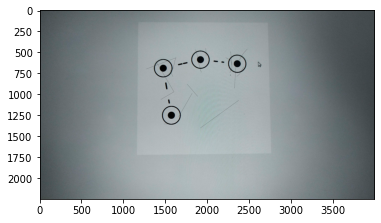

In [2]:
img = cv2.imread("test4.png")
# template = cv2.imread("template.png")
plt.imshow(img)

In [3]:
def find_detectors(image):    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Converting to GrayScale
    blur  = cv2.blur(gray,(12,12))
    tolerance = 1.5
    # edge = cv2.Canny(blur,100,150)
    _,binary = cv2.threshold(blur,150,255,cv2.THRESH_BINARY)
    # binary = cv2.dilate(binary,(3,3),None)
    # binary = cv2.erode(binary,(2,2),None)
    # thresh_image = binary.astype(np.uint8)
#     plt.figure()
#     plt.imshow(binary,cmap="gray")
    regions, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print()
    contour_list = []
    for i in range(len(regions)):
        (x,y),radius = cv2.minEnclosingCircle(regions[i])
        center = (int(x),int(y))
        area = math.pi*(radius**2)
        cnt_area = cv2.contourArea(regions[i],True)
        if ((cnt_area/area) < tolerance ):
            contour_list.append((regions[i],i))
    # hierarchy #########
    hierarchy = hierarchy[0]
    for (region,i) in contour_list:
        x, y, w, h = cv2.boundingRect(region)
        if(hierarchy[i][2]>0): #checking child contour of this
            if(hierarchy[(hierarchy[i][2])][2]>0): #checking child contour of this
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 5)
    plt.imshow(image)
#     cv2.waitKey(0)
                


# cv2.drawContours(image,contour_list,-1,(0,0,255),5)


    
    

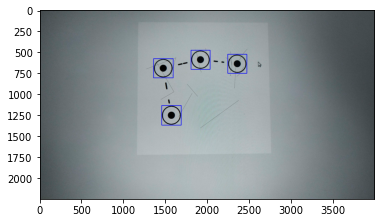

In [4]:
find_detectors(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

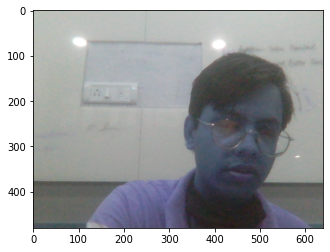

In [5]:
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
  
    # Display the resulting frame
    find_detectors(frame)
    cv2.imshow("frame",frame)
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()